In [1]:
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2

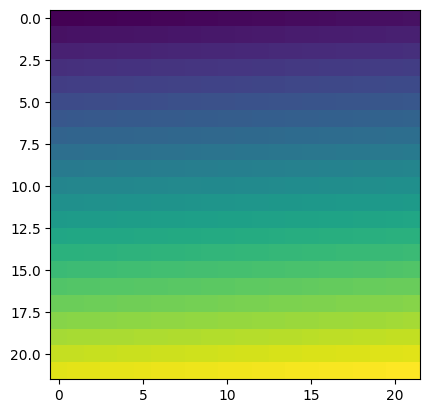

In [2]:
W,H  = 22,22
C_in = 3
img = np.arange(W*H*C_in).reshape((W,H,C_in))
plt.imshow(img[:,:,0])

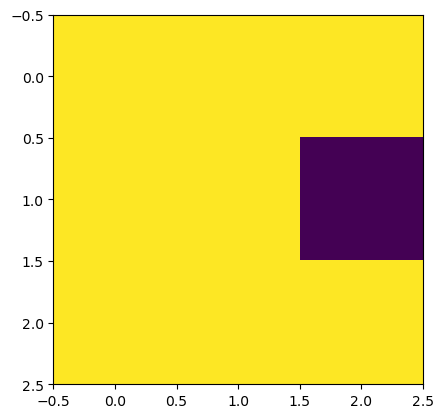

In [3]:
C_out = 5
kernel = np.random.uniform(0,1,(3,3, C_out)).round()
plt.imshow(kernel[:,:,0])

(20, 20, 3, 3) (3, 3, 5)
(20, 20, 5)


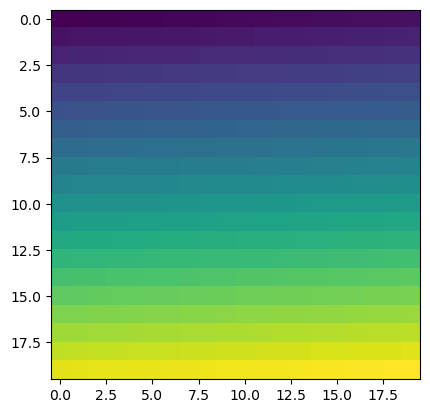

In [4]:
expanded_input = np.lib.stride_tricks.as_strided(
    img,
    shape=(
        img.shape[0] - kernel.shape[0] + 1,  # The feature map is a few pixels smaller than the input
        img.shape[1] - kernel.shape[1] + 1,
        kernel.shape[0],
        kernel.shape[1],
    ),
    strides=(
        img.strides[0],
        img.strides[1],
        img.strides[0],  # When we move one step in the 3rd dimension, we should move one step in the original data too
        img.strides[1],
    ),
    writeable=False,  # totally use this to avoid writing to memory in weird places
)
print(expanded_input.shape, kernel.shape)
feature_map = np.einsum('xyij,ijz -> xyz',expanded_input, kernel)
print(feature_map.shape)
plt.imshow(feature_map[:,:,1])

In [25]:
from juligrad import ops, tensor

In [33]:
N, W, H, C_in = 32,8,8,3
x= tensor.Tensor.uniform((N, C_in, H, W))

Wk, Hk, C_out = 5,5,15
kernel = tensor.Tensor.uniform((C_out, C_in, Wk, Hk))
bias = tensor.Tensor.uniform((C_out, 1 ))
print(x.shape,kernel.data.shape,bias.shape)
conv = ops.Conv2D()
feature_map = conv.forward(x,kernel,bias)
print(feature_map.shape)

(32, 3, 8, 8) (15, 3, 5, 5) (15, 1)
(32, 15, 4, 4)


In [37]:
grad_out = tensor.Tensor.randn(size=feature_map.shape)
feature_map.backward(grad_out)

In [16]:
bias.grad.data

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [15]:
batch_size = 32
channels = 3
height = width = 8
kernel_size = 2
num_filters = 15

windowed_input = np.random.rand(batch_size, channels, height, width, kernel_size, kernel_size)
weights = np.random.rand(num_filters, channels, kernel_size, kernel_size)
result = np.einsum('bchwkt,fckt->bfhw', windowed_input, weights)

In [9]:
print(windowed_input.shape)
print(weights.shape)
result.shape

(32, 3, 8, 8, 2, 2)
(15, 3, 2, 2)


(32, 15, 8, 8)